In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(8219, 4)

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
GDP_per_Capita = gdp_df.drop(columns = ['Value Footnotes'])
GDP_per_Capita

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [8]:
GDP_per_Capita = GDP_per_Capita.rename(columns={'Country or Area':'Country','Year':'year','Value':'GDP_Per_Capita'})

In [9]:
GDP_per_Capita

,Country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [10]:
GDP_per_Capita['year'].nunique()

34

In [11]:
year_count = GDP_per_Capita['Country'].value_counts()

In [12]:
year_count

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [13]:
GDP_per_Capita['year'].value_counts()

year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

In [14]:
year_count = year_count.to_frame()

In [15]:
year_count = year_count.reset_index()

In [16]:
type(year_count)

pandas.core.frame.DataFrame

In [17]:
year_count


,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [18]:
year_count.loc[year_count['count']<34]

,Country,count
228,Lebanon,33
229,Tonga,33
230,Bhutan,33
231,Syrian Arab Republic,33
232,Somalia,33
233,Greenland,32
234,West Bank and Gaza,30
235,Serbia,29
236,Montenegro,27
237,San Marino,26


### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [19]:
GDP_per_Capita.head()

,Country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [20]:
gdp_2020 = GDP_per_Capita.loc[GDP_per_Capita['year'] == 2020]

In [21]:
gdp_2020.head()

,Country,year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


Text(0.5, 1.0, 'GDP_per_capita in 2020')

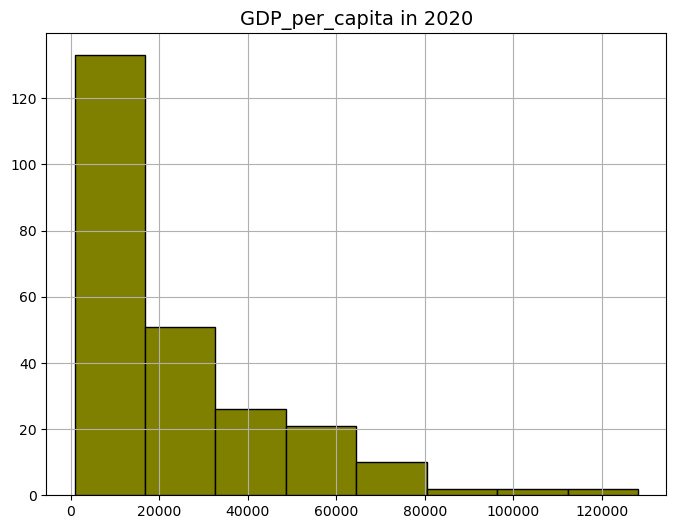

In [22]:
gdp_2020['GDP_Per_Capita'].hist(bins =8 ,color = 'olive',edgecolor = 'black',figsize = (8,6))
plt.title('GDP_per_capita in 2020',fontsize  = 14)

<Axes: ylabel='Density'>

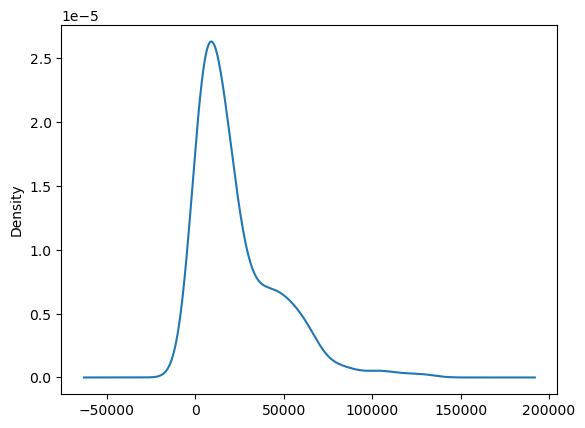

In [23]:
gdp_2020['GDP_Per_Capita'].plot.kde()

<Axes: xlabel='GDP_Per_Capita'>

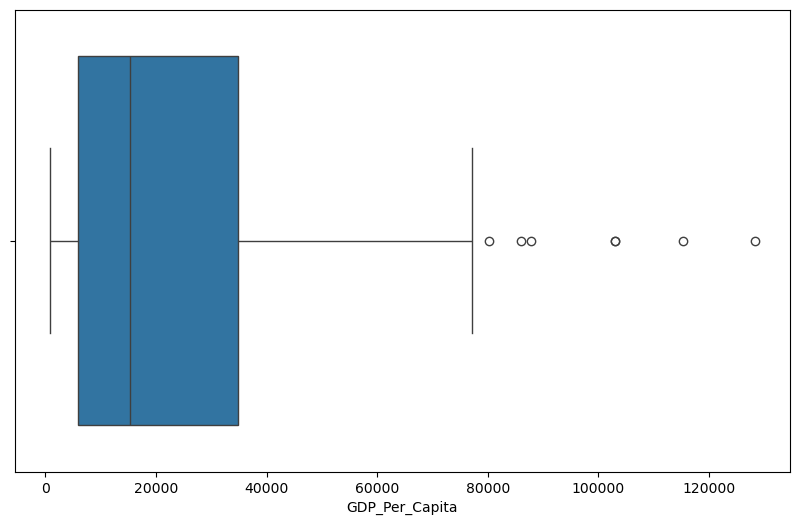

In [24]:
plt.figure(figsize = (10,6))
sns.boxplot( data = gdp_2020,x = 'GDP_Per_Capita')


### we can see boxplot gives the outliers info.

### A violin plot allows you to visualize the distribution of a numeric variable for one or several groups.
##  It allows to compare distributions from one group to another.

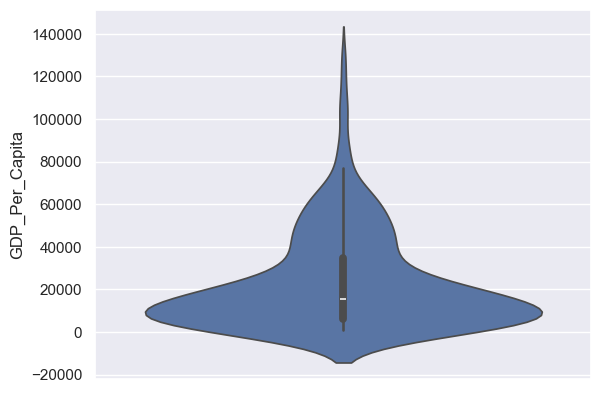

In [25]:
sns.set_theme(style="darkgrid")
sns.violinplot(y=gdp_2020 ['GDP_Per_Capita'])
plt.show()

### 9. What was the median GDP per capita value in 2020?

In [26]:
gdp_2020['GDP_Per_Capita'] .mean()

np.float64(23044.942555569738)

#### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [27]:
GDP_per_Capita


,Country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [28]:
subset_1990 = GDP_per_Capita[(GDP_per_Capita['year'] >=1900 )& (GDP_per_Capita['year'] <1999)]
subset_1990.head(5)


,Country,year,GDP_Per_Capita
49,Africa Eastern and Southern,1998,3155.073755
50,Africa Eastern and Southern,1997,3177.467287
51,Africa Eastern and Southern,1996,3133.177681
52,Africa Eastern and Southern,1995,3048.085253
53,Africa Eastern and Southern,1994,2993.630132


In [51]:
gdp_decades = GDP_per_Capita[GDP_per_Capita['year'].isin([1990,2000,2010,2020])]

In [52]:
gdp_decades.head(20)

,Country,year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
47,Africa Eastern and Southern,2000,3176.568655
57,Africa Eastern and Southern,1990,3386.854480
61,Africa Western and Central,2020,4622.731427
71,Africa Western and Central,2010,4343.405839
81,Africa Western and Central,2000,3139.324872


In [53]:
gdp_decades = gdp_decades.reset_index(drop = True)
gdp_decades.shape

(965, 3)

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

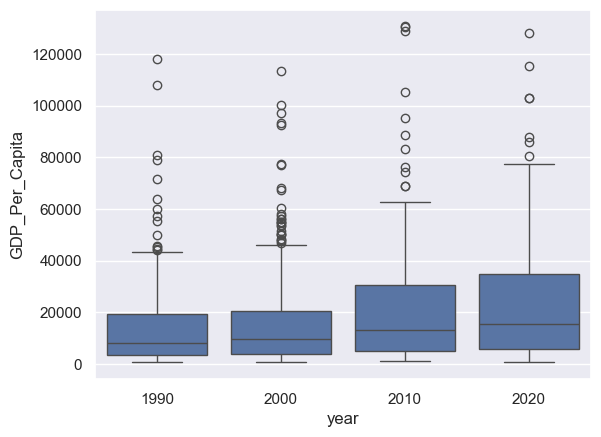

In [60]:
sns.boxplot(x= gdp_decades['year'], y= gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

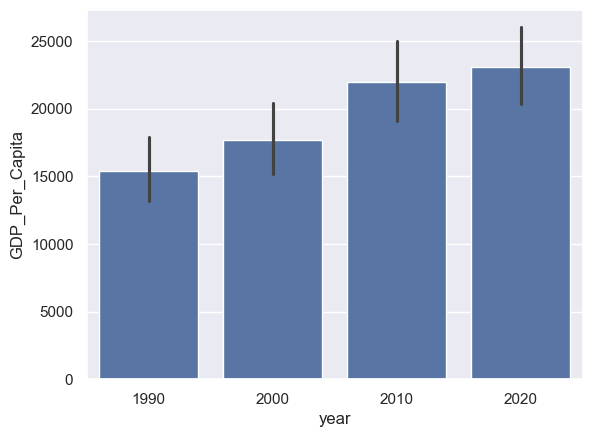

In [55]:
sns.barplot (x = 'year', y ='GDP_Per_Capita',data =gdp_decades)

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

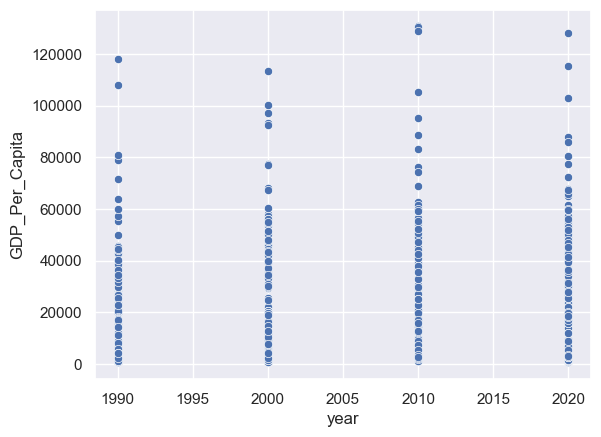

In [61]:
sns.scatterplot(data = gdp_decades,x = "year",y = "GDP_Per_Capita")

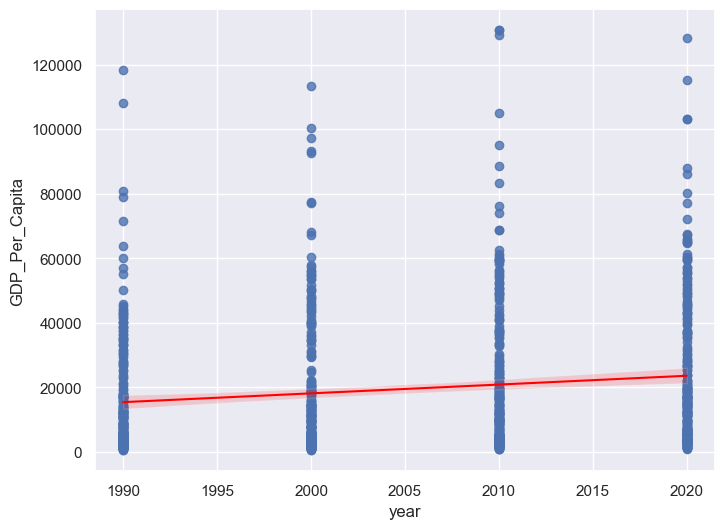

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
ax=ax
)
plt.show()

### 11. Which country was the first to have a GDP per capita greater than $100,000?


In [69]:
gdp_100k = gdp_decades.loc[gdp_decades['GDP_Per_Capita']>100000]
gdp_100k.head()

,Country,year,GDP_Per_Capita
88,Bermuda,2010,105121.639689
113,Brunei,2000,100323.440022
114,Brunei,1990,118163.683198
411,Ireland,2020,102989.787335
521,Luxembourg,2020,128256.560341


In [70]:
gdp_100k.sort_values('year')

,Country,year,GDP_Per_Capita
114,Brunei,1990,118163.683198
919,United Arab Emirates,1990,108057.042464
523,Luxembourg,2000,113436.588273
113,Brunei,2000,100323.440022
526,"Macao SAR, China",2010,130596.059759
522,Luxembourg,2010,130620.266278
721,Qatar,2010,129045.005599
88,Bermuda,2010,105121.639689
521,Luxembourg,2020,128256.560341
411,Ireland,2020,102989.787335


### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.